In [26]:
from IPython.display import display, HTML

In [27]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import KFold, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')

In [28]:
data = pd.read_csv('C:/Users/win10/Downloads/HousePrices2.csv', index_col = 'Id')
data.head()
print(data.shape)
data.info()

(1460, 80)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 1

In [29]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


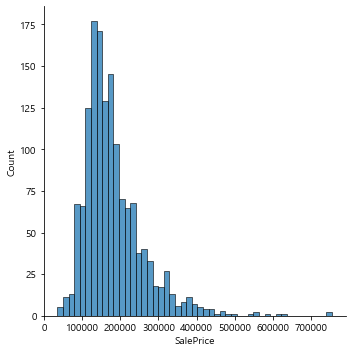

In [30]:
# 숫자 > 범주형 변환
for categ in ['MSSubClass', 'OverallQual', 'OverallCond']:
    data[categ] = data[categ].astype(str)
f = sns.displot(data['SalePrice'])

In [38]:
X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

display(X.head(3))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [39]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.3, random_state = 2021)

In [85]:
for feature in ['LotFrontage', 'LotArea','MasVnrArea',
                'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                '1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath', 'Fireplaces', 'BsmtHalfBath',
                'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageArea',
                'GarageYrBlt','GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea','MiscVal']:
    X_tr[feature] = X_tr[feature].fillna(X_tr[feature].mean())
    X_te[feature] = X_te[feature].fillna(X_tr[feature].mean())

for feature in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
                'GarageCond','GarageType','GarageFinish', 'GarageQual',
                'BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType',
               'Electrical','MSZoning','Functional','Utilities','KitchenQual',
                'SaleType','Exterior1st','Exterior2nd','MasVnrArea']:
    X_tr[feature] = X_tr[feature].fillna('NaN')
    X_te[feature] = X_te[feature].fillna('NaN')

In [86]:
# 결측치 확인, 대체(Null, NaN, NA)
NaNinfo = X_tr.isnull().sum()
NaNinfo2 = NaNinfo.sort_values(ascending=False)
NaNinfo3 = NaNinfo2[NaNinfo2 > 0]
NaNinfo3

Series([], dtype: int64)

In [87]:
for col in NaNinfo3.index:
    print(f'{col}: {data[col].unique().tolist()[:10]}')

# Target 값에 결측이 있다면 관측치는 제거
# 수치형데이터는 평균값(중앙값) 으로 대체
# 범주형은 NaN으로 대체




In [88]:
X[['FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','FireplaceQu','GarageArea']]

,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,FireplaceQu,GarageArea
Id,,,,,,,
1,2,1,3,1,8,NaN,548
2,2,0,3,1,6,TA,460
3,2,1,3,1,6,TA,608
4,1,0,3,1,7,Gd,642
5,2,1,4,1,9,TA,836
...,...,...,...,...,...,...,...
1456,2,1,3,1,7,TA,460
1457,2,0,3,1,7,TA,500
1458,2,0,4,1,9,Gd,252


In [89]:
category = list(X_tr.select_dtypes(include=[object]))
category[:10]

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood']

In [90]:
# 카테고리 변수 encoding(vectorizing)
# 수치형변수 scaling
# 주의: 전체 데이터 셋이 아닌 학습 데이터로 encoding, scaler fitting


#whole data = pd.concat([X_train, X_test, axis =0])
# categr
vec = DictVectorizer()

# to_dict('records') : 열이름은 키로 변환되고 각 레코드는 값으로 변환, 인덱스는 키로 사용
vec.fit(X_tr[category].to_dict('records'))

scaler = StandardScaler()
scaler.fit(X_tr.drop(category,axis = 1))

StandardScaler()

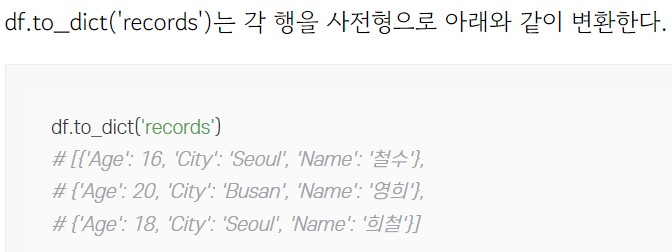

In [91]:
X_category = vec.transform(X_tr[category].to_dict('records'))
X_train_category = pd.DataFrame(X_category.toarray(), columns=vec.feature_names_)
display(X_train_category.head())
X_train_without_category = X_tr.drop(category, axis =1)
X_scale = scaler.transform(X_train_without_category)
X_train_scale = pd.DataFrame(X_scale, columns=X_train_without_category.columns)
display(X_train_scale.head())

,Alley=Grvl,Alley=NaN,Alley=Pave,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=Twnhs,BldgType=TwnhsE,BsmtCond=Fa,BsmtCond=Gd,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.001570,-0.053056,0.750385,0.445263,1.506176,0.598808,-0.298245,-0.293608,0.237928,0.096438,...,1.700600,1.625172,0.447993,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,2.067295,-1.332473
1,0.679972,0.066754,0.114431,-0.484927,-0.559450,0.194942,-0.298245,-0.898675,-0.799522,-0.908490,...,-0.191876,0.852289,2.416323,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,-1.585498,-1.332473
2,0.634030,-0.056239,1.118569,1.032751,0.476005,-0.923128,-0.298245,2.253678,1.126188,0.991132,...,1.414420,0.349915,-0.430185,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,0.240899,-1.332473
3,-0.055109,-0.045540,-0.320695,-1.121373,-0.559450,0.692335,-0.298245,-0.949482,-0.312930,-0.426535,...,-0.810393,0.396288,0.357147,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,-0.489660,-1.332473
4,1.185341,0.049070,-0.153339,1.081709,1.025429,-0.974142,-0.298245,0.364576,-0.806408,1.878136,...,0.408177,1.091883,-0.733005,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,-0.124381,1.662112


In [92]:
X_train_final = pd.concat([X_train_scale, X_train_category], axis =1)
X_train_final.tail()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
1017,0.909685,0.007070,0.080960,0.592135,-0.55945,1.057939,0.767859,-0.388294,1.057331,0.980878,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1018,0.909685,0.300185,-0.521523,0.934836,-0.55945,-0.344962,2.905925,-0.743944,0.026766,1.655103,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1019,0.863743,0.081786,1.085098,0.934836,-0.55945,-0.974142,-0.298245,0.710988,-0.462121,-0.782874,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1020,0.000000,-0.284718,0.951213,0.739007,-0.55945,0.158807,-0.298245,-0.626164,-0.567703,-0.900800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1021,-0.468592,-0.297982,-0.688879,-1.659904,-0.55945,0.836876,-0.298245,-1.044168,-0.250959,-0.547024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [93]:
X_category = vec.transform(X_te[category].to_dict('records'))
X_test_category = pd.DataFrame(X_category.toarray(), columns=vec.feature_names_)
display(X_test_category.head())

X_test_without_category = X_te.drop(category, axis=1)
X_scale = scaler.transform(X_test_without_category)
X_test_scale = pd.DataFrame(X_scale, columns = X_test_without_category.columns)
display(X_test_scale.head())

,Alley=Grvl,Alley=NaN,Alley=Pave,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=Twnhs,BldgType=TwnhsE,BsmtCond=Fa,BsmtCond=Gd,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.157731e+00,-0.221763,-1.927316,-1.708861,-0.559450,-0.542644,-0.298245,0.251415,-0.452940,-0.772620,...,-1.271972,-0.763037,-0.733005,1.249145,-0.115265,-0.272777,-0.06189,-0.084569,-0.124381,1.662112
1,-4.685922e-01,0.007070,-2.395914,0.739007,-0.559450,-0.974142,-0.298245,-1.275109,-2.436032,-1.208431,...,-2.195131,0.937306,0.993069,3.152414,-0.115265,-0.272777,-0.06189,-0.084569,0.606178,0.164819
2,6.799722e-01,-0.003717,0.683443,0.739007,1.220898,0.513784,-0.298245,0.995046,1.426865,2.470326,...,0.302014,-0.763037,-0.233352,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,-0.854940,-0.583827
3,-1.436343e-14,-0.481808,0.482615,0.053604,-0.559450,1.325766,-0.298245,-0.418316,0.898959,0.737337,...,-0.141102,-0.763037,0.478275,-0.353608,-0.115265,3.130109,-0.06189,-0.084569,2.067295,-1.332473
4,4.502593e-01,-0.094614,0.181374,-0.387012,1.342405,0.484025,-0.298245,0.258343,0.662549,0.432269,...,0.712820,-0.763037,-0.490749,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,-0.854940,0.913466


In [94]:
X_test_final = pd.concat([X_test_scale, X_test_category], axis = 1)
X_test_final.tail()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
433,-1.436343e-14,-0.141035,0.683443,0.347348,0.338648,-0.974142,-0.298245,-0.388294,-1.554658,-0.905927,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
434,-2.260353e+00,-0.816039,0.014017,-0.631799,-0.559450,-0.655301,2.513458,-1.275109,-0.990028,-1.372501,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
435,1.093455e+00,-0.028121,1.252454,1.179623,-0.559450,-0.974142,-0.298245,1.556235,0.377938,0.155401,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
436,-1.754984e+00,-0.549981,0.884270,0.641092,1.131088,0.866635,-0.298245,-0.494527,0.327443,0.099002,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
437,2.205465e-01,0.245806,-2.630213,0.739007,-0.559450,-0.974142,-0.298245,1.581638,0.403186,0.911661,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [95]:
X_train, y_train = X_train_final.values, y_tr.values
X_test, y_test = X_test_final.values, y_te.values

3. 모델링

In [96]:
model_LR = LinearRegression(n_jobs=-1)
model_LR.fit(X_train, y_train)
display(pd.DataFrame(model_LR.coef_, index=X_test_final.columns, columns=['LR계수']))

,LR계수
LotFrontage,2.356327e+03
LotArea,6.737980e+03
YearBuilt,1.049169e+04
YearRemodAdd,2.092349e+03
MasVnrArea,3.409768e+03
...,...
SaleType=WD,5.870507e+14
Street=Grvl,-5.773179e+14
Street=Pave,-5.773179e+14
Utilities=AllPub,-1.687946e+14


In [103]:
model_Lasso1 = Lasso(alpha=0.0001, random_state=1)
model_Lasso2 = Lasso(alpha=100.0, random_state=1)
model_Ridge1 = Ridge(alpha=0.0001, random_state=1)
model_Ridge2 = Ridge(alpha=100, random_state=1)

model_Lasso1.fit(X_train, y_train)
model_Lasso2.fit(X_train, y_train)
model_Ridge1.fit(X_train, y_train)
model_Ridge2.fit(X_train, y_train)

Ridge(alpha=100, random_state=1)

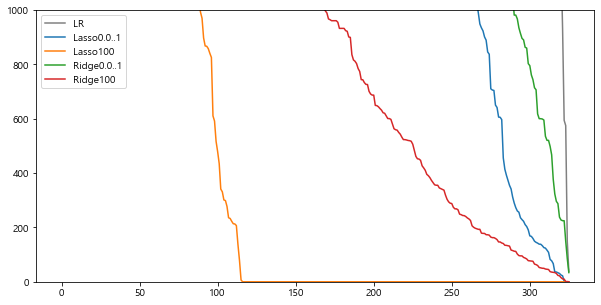

In [106]:
plt.figure(figsize=(10,5))
plt.plot(sorted(np.abs(model_LR.coef_))[::-1], label='LR', c='gray')
plt.plot(sorted(np.abs(model_Lasso1.coef_))[::-1], label='Lasso0.0..1')
plt.plot(sorted(np.abs(model_Lasso2.coef_))[::-1], label='Lasso100')
plt.plot(sorted(np.abs(model_Ridge1.coef_))[::-1], label='Ridge0.0..1')
plt.plot(sorted(np.abs(model_Ridge2.coef_))[::-1], label='Ridge100')
plt.legend()
plt.ylim((-0.1, 1000))
plt.show()

K-Fold Cross Validation

Train set/ Validation set / Test set > K-Fold Cross validation
 - 모든 데이터셋을 Train에 활용
 - 정확도 향상
 - 데이터 부족으로 인한 underfitting 방지
 
 - 모든 데이터 셋을 Validation에 활용
 - 평가에 활용되는 데이터 편중 방지
 - 평가 결과에 더 일반화된 모델 구축 가능


In [107]:
cv = 5
max_iter = 5000

n_trials = 50
def myrange(start, end, step):
    r = start
    while r<end:
        yield r
        r += step

# 알파값으로 사용할 리스트를 만드는 과정
alpha_list = list(reversed([round(i, 2) for i in myrange(0.01, 10, 0.1)]))

myrange(0.01, 10, 0.1)

<generator object myrange at 0x000001A6548FE2E0>

In [109]:
import time

def return_abc():
  alphabets = []
  for ch in "ABC":
    time.sleep(1)
    alphabets.append(ch)
  return alphabets

def yield_abc():
  for ch in "ABC":
    time.sleep(1)
    yield ch

return_abc() # 3초 후 a,b,c 출력


['A', 'B', 'C']

In [111]:
model_Lasso = LassoCV(alphas=alpha_list, cv=cv, n_jobs=-1, random_state=1, max_iter=max_iter)
model_Lasso.fit(X_train, y_train)

LassoCV(alphas=[9.91, 9.81, 9.71, 9.61, 9.51, 9.41, 9.31, 9.21, 9.11, 9.01,
                8.91, 8.81, 8.71, 8.61, 8.51, 8.41, 8.31, 8.21, 8.11, 8.01,
                7.91, 7.81, 7.71, 7.61, 7.51, 7.41, 7.31, 7.21, 7.11, 7.01, ...],
        cv=5, max_iter=5000, n_jobs=-1, random_state=1)

In [112]:
# 최적 알파값 도출
model_Lasso.alpha_

9.91

In [113]:
#학습 모델 사용 예측값 출력
pred_train_LR = model_LR.predict(X_train)
pred_test_LR = model_LR.predict(X_test)
pred_train_Lasso = model_Lasso.predict(X_train)
pred_test_Lasso = model_Lasso.predict(X_test)

In [114]:
train_rmse_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))
train_mae_LR = mean_absolute_error(y_train, pred_train_LR)
train_r2_LR = r2_score(y_train, pred_train_LR)

test_rmse_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))
test_mae_LR = mean_absolute_error(y_test, pred_test_LR)
test_r2_LR = r2_score(y_test, pred_test_LR)

train_rmse_Lasso = np.sqrt(mean_squared_error(y_train, pred_train_Lasso))
train_mae_Lasso = mean_absolute_error(y_train, pred_train_Lasso)
train_r2_Lasso= r2_score(y_train, pred_train_Lasso)

test_rmse_Lasso = np.sqrt(mean_squared_error(y_test, pred_test_Lasso))
test_mae_Lasso = mean_absolute_error(y_test, pred_test_Lasso)
test_r2_Lasso = r2_score(y_test, pred_test_Lasso)

In [115]:
results = pd.DataFrame(index=['rmse', 'mae', 'r2'], columns = ['LRtr', 'LRte', 'LStr', 'LSte'])

In [116]:
results.loc['rmse', 'LRtr'] = train_rmse_LR
results.loc['mae', 'LRtr'] = train_mae_LR
results.loc['r2', 'LRtr'] = train_r2_LR

results.loc['rmse', 'LRte'] = test_rmse_LR
results.loc['mae', 'LRte'] = test_mae_LR
results.loc['r2', 'LRte'] = test_r2_LR

results.loc['rmse', 'LStr'] = train_rmse_Lasso
results.loc['mae', 'LStr'] = train_mae_Lasso
results.loc['r2', 'LStr'] = train_r2_Lasso

results.loc['rmse', 'LSte'] = test_rmse_Lasso
results.loc['mae', 'LSte'] = test_mae_Lasso
results.loc['r2', 'LSte'] = test_r2_Lasso


In [117]:
results

,LRtr,LRte,LStr,LSte
rmse,19574.421663,665852402274902.625,19789.485726,25548.615452
mae,12289.997737,69671433420427.5,12584.503316,16353.201824
r2,0.940672,-74749425241816399872.0,0.939362,0.889951


K fold cross validation 으로 하이퍼 파라미터 찾기 + 모델 비교 선택

In [118]:
models = {}

n_trials = 20
alpha_list = 10 ** np.linspace(-3, 3, n_trials)

cv = 5

alpha_list = list(reversed([round(i,2) for i in myrange(0.01, 10, 0.1)]))
l1_list = list(reversed([round(i,2) for i in myrange(0,1, 0.1)]))

max_iter = 5000

In [119]:
# find optimal Lasso model
model = LassoCV(alphas = alpha_list, cv = cv, n_jobs=-1, random_state=1, max_iter = max_iter)
model.fit(X_train, y_train)
models['Lasso'] = Lasso(alpha=model.alpha_, max_iter=max_iter)

In [120]:
model = RidgeCV(alphas = alpha_list, cv=cv)
model.fit(X_train, y_train)
models['Ridge'] = Ridge(alpha=model.alpha_)

In [121]:
model = ElasticNetCV(alphas = alpha_list, l1_ratio = l1_list, cv=cv, random_state=1, max_iter = max_iter)
model.fit(X_train, y_train)
models['ElasticNet'] = ElasticNet(alpha=model.alpha_, l1_ratio = model.l1_ratio_, max_iter= max_iter)

In [122]:
for name in models.keys():
    print(models[name])
    print('-'*100)

Lasso(alpha=9.91, max_iter=5000)
----------------------------------------------------------------------------------------------------
Ridge(alpha=6.51)
----------------------------------------------------------------------------------------------------
ElasticNet(alpha=0.01, l1_ratio=0.2, max_iter=5000)
----------------------------------------------------------------------------------------------------


In [123]:
kf = KFold(cv, shuffle=True, random_state=1)
kf

KFold(n_splits=5, random_state=1, shuffle=True)

In [124]:
score = {}

for name in models.keys():
    if name not in score:
        score[name] = []
    
    reg = models[name]
    for i_train, i_valid in kf.split(X_train):
        reg.fit(X_train[i_train], y_train[i_train])
        
        y_pred = reg.predict(X_train[i_valid])
        RMSE = np.sqrt(mean_squared_error(y_train[i_valid], y_pred))
        score[name].append(RMSE)

In [125]:
score

{'Lasso': [41204.056090292834,
  24406.85535256317,
  52724.65908811302,
  25677.064668282,
  60371.02002502081],
 'Ridge': [48355.7380739665,
  27423.14010452583,
  52616.160612484,
  26448.23570443164,
  32245.27525602184],
 'ElasticNet': [48355.756251643295,
  27424.498989803942,
  52616.89005871898,
  26443.93050840965,
  32237.564045650513]}

In [126]:
results = pd.DataFrame(score)
results

,Lasso,Ridge,ElasticNet
0,41204.056090,48355.738074,48355.756252
1,24406.855353,27423.140105,27424.498990
2,52724.659088,52616.160612,52616.890059
3,25677.064668,26448.235704,26443.930508
4,60371.020025,32245.275256,32237.564046


,mean,std
Lasso,40876.731045,15990.579310
Ridge,37417.709950,12223.013479
ElasticNet,37415.727971,12224.748723


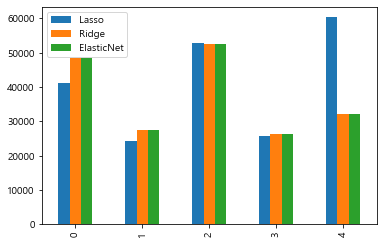

In [127]:
ax = results.plot.bar()

pd.concat([results.mean(), results.std()], axis = 1, keys=['mean', 'std'])

최종 모델 학습, 결과 출력, 성능 확인

In [128]:
model = models['ElasticNet'].fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [129]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
print('train rmse:', rmse_train)
print('test rmse', rmse_test)

train rmse: 25063.08035006271
test rmse 26427.67768135728


In [130]:
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print('train r2:', r2_train)
print('test r2:', r2_test)

train r2: 0.9027371018339876
test r2: 0.8822475590542879


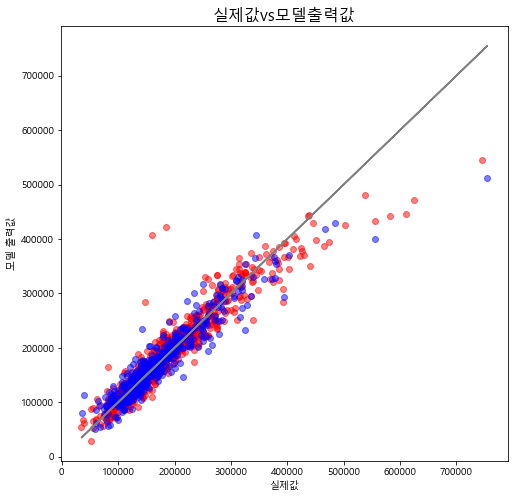

In [131]:
plt.figure(figsize=(8,8))
plt.title('실제값vs모델출력값', fontsize=16)
plt.scatter(y_train, pred_train, c='red', alpha=0.5)
plt.scatter(y_test, pred_test, c='blue', alpha=0.5)
plt.plot(y_test, y_test, c= 'gray')
plt.plot(y_train, y_train, c='gray')
plt.xlabel('실제값', size=10)
plt.ylabel('모델 출력값', size =10)
plt.show()

In [132]:
model = models['ElasticNet'].fit(X_train, y_train)

In [133]:
coef_df = pd.DataFrame(model.coef_.reshape(-1,1), index=X_test_final.columns, columns=['coefficients'])
coef_df.to_csv('coef.csv')
coef_df

,coefficients
LotFrontage,-3255.873629
LotArea,5544.229309
YearBuilt,8405.871420
YearRemodAdd,1632.485538
MasVnrArea,3197.607688
...,...
SaleType=WD,-8285.050781
Street=Grvl,-6405.206988
Street=Pave,6405.206986
Utilities=AllPub,2793.578106


In [134]:
coefficients = np.abs(coef_df.coefficients)
index = np.argsort(coefficients[::-1])
print(index)

Utilities=NoSeWa    141
Utilities=AllPub    295
Street=Pave         237
Street=Grvl          37
SaleType=WD         148
                   ... 
MasVnrArea           33
YearRemodAdd         59
YearBuilt            66
LotArea              31
LotFrontage          39
Name: coefficients, Length: 326, dtype: int64


In [135]:
importance = coefficients[index]
columns = [list(coef_df.index)[i] for i in index]

In [136]:
importance =importance[importance > 0]

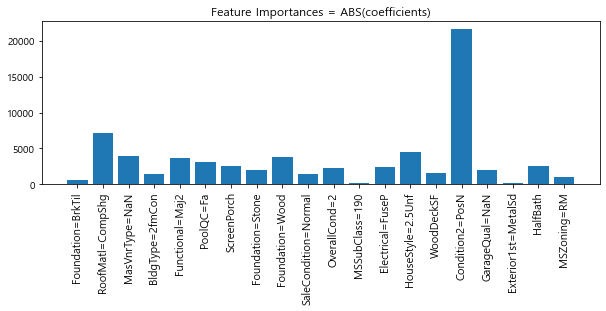

In [137]:
num_print = 20

plt.figure(figsize = (10, 3))
plt.title('Feature Importances = ABS(coefficients)')
plt.bar(range(num_print),
       importance[:num_print],
       align='center')
plt.xticks(range(num_print), columns[:num_print], rotation=90, fontsize=11)
plt.show()